# COGS 108 - Final Project 

# Overview

We want to know if different cities in San Diego have different death rates. San Diego Department of the Medical Examiner released a dataset about the details of death cases from January 1, 1997 to June 30, 2019. We analyze death data based on the cause of death, age and location of death. Drugs are the leading cause of death between Escondido and La Jolla.

# Names

- Jeff Liao
- Sally Poon
- Pan Yeung
- Chieh Pan

# Research Question

Within the same county, do different cities have different death rates?

## Background and Prior Work

In this project, we aim to answer our hypothesis using a data set from the San Diego Department of the Medical Examiner. According to the department’s website, “in general, all deaths in which any injury - either physical or chemical - contributed to the death in any way are under our jurisdiction and must be reported. This includes drug, medication, or alcohol intoxication.” In other words, any death that has an associated injury must be reported. Deaths that are not required to be reported but are generally reported include:  
- Dead on arrival
- Operating room deaths
- Therapy-related deaths
- Emergency Room deaths
- Anesthetic-related deaths
- Coma
- Unidentified persons
- Food poisoning
- Gastrointestinal hemorrhage
- Maternal deaths
- Fetuses
- Subdural
- Osteoporotic hip fractures
- Any death without an underlying etiologic specific underlying cause  
  
There are also articles stating that the leading causes of death are car accidents, drugs, alcohol, and suicide.[2] The leading causes of death do not seem too uncommon. Through our project, we want to see if those are indeed the leading causes of death. In addition, we want to see whether the death rates are similar throughout the different cities within San Deigo county. We specifically compared between La Jolla and Escondido because their number of deaths were similar. Additional information about each city are shown below:  

| Cities | La Jolla | Escondido |
|---|---|---|
| Average Salary | 70K [3] | 64K [4]|
| Median Age | 48.1 [5] | 33 [6] |
  
Because there seems to be some difference in age and income, we wanted to see whether these attributes may cause differences in death rate i.e. whether age and income may affect the death rate when compared with the overall population. 

In the project we chose our hypothesis to focus on whether the death rate for La Jolla and Escondido come from the same population. This is mainly established on the assumption that the two cities have different median age and mean salary. 

References:  
[1] https://www.sandiegocounty.gov/content/sdc/me/hospitals/reporting.html  
[2] https://channel933.iheart.com/content/suicide-drugs-alcohol-car-accidents-leading-causes-of-death-in-san-diego-2018/  
[3] https://www.payscale.com/research/US/Location=La-Jolla-CA/Salary  
[4] https://www.payscale.com/research/US/Location=Escondido-CA/Salary  
[5] https://www.areavibes.com/san+diego-ca/la+jolla/demographics/  
[6] https://www.areavibes.com/escondido-ca/demographics/  

# Hypothesis


The death rate for La Jolla and Escondido come from the same population. In other words, the death rate is not dependent on location, at least for these two cities.

# Dataset(s)

- Dataset Name: medical_examiner.csv
- Link to the dataset: https://data.sandiegocounty.gov/Safety/Medical-Examiner-Cases/jkvb-n4p7
- Number of observations: 61927

This dataset is from San Diego Department of the Medical Examiner.

| Column Name | Description | Type |
| --- | --- | --- |
| Row Number | A non-identifiable row number has been added to distinguish individual case records. | Number |
| Year | The year the Medical Examiner took jurisdiction of the case for investigation. | Number |
| Quarter | Calendar year quarter based on the date of death or the quarter in which the Medical Examiner took jurisdiction if outside of the current year. | Plain Text|
| Age in Years |The age of the decedent at time of death, represented in whole years; individuals under the age of 1 are listed at age 0 years. | Number |
| Death Date | Decedent's date of death. | Date & Time |
| Security Status | Indicates if record is sealed or access free. |Plain Text |
| Gender | Gender | Plain Text |
| Race | Race/Ethnicity as determined by the Medical Examiner. |Plain Text |
| Ethnic Group (Standardized) | Ethnic Group categorization based upon the indicated race/ethnicity. | Plain Text |
| Manner of Death |This is the manner of death category: Natural, Accident, Homicide, Suicide, or Undetermined. | Plain Text |
| Manner Type | This is the type or method of death determined by the Medical Examiner. | Plain Text |
| Manner Type (Standardized) | A standardized Manner Type of death to provide consistency due to categorizations that may have changed over time. | Plain Text|
| Manner Sub Type | This is the sub-type or sub-method of death determined by the Medical Examiner. | Plain Text |
| Opioid Related| Indicates if an Opioid is listed in the Cause of Death, Contributing Conditions, or How Injury Occurred column. Currently includes the following: opiate, opioid, U-47700, tramadol, oxymorphone, oxycodone, morphine, mitragynine, methadone, hydromorphone, hydrocodone, heroid, fentanyl, dihydrocodeine, codeine, buprenorphine, carfentanil | Plain Text |
| Coronado Bridge Related (Suicide Cases) | Indicate if the event location was the Coronado Bay Bridge. | Plain Text |
| Cause of Death | A description of the cause of death. |  Plain Text |
| Contributing Conditions | This includes conditions that contributed to the cause of death. | Plain Text |
| How Injury Occurred | A description as to how the injury leading to death occurred. | Plain Text |
| Event Date | Date when the event causing death occurred. |Plain Text |
| Event Time | Time when the event causing death occurred. | Plain Text|
| Event Place | Place where the event causing death occurred. | Plain Text|
| Event Place Type | General categorization of Event Place. |Plain Text|
| Event City | City where the event causing death occurred. |Plain Text|
| Event Zip | Zip code where the event causing death occurred. |Plain Text|
| Death Place | Place where death occurred. |Plain Text|
| Death Place Type | General categorization of Death Place. | Plain Text |
| Death City | City where death occurred. | Plain Text|
| Death Zip | Zip code where death occurred. | Plain Text |
| Res City | Decedent's city of residence. | Plain Text |
| Res Zip | Decedent's Zip code of residence. | Plain Text |




- Dataset Name: zip_pop.csv
- Link to the dataset: A4 HW
- Number of observations:33092

This is used for safe harbor to conceal all zipcodes with over 20,000 people and delete all zipcodes with less than 20,000 people.

- Dataset Name: zip-code-tabulation-areas-2012.geojson
- Link to the dataset: https://boundaries.latimes.com/set/zip-code-tabulation-areas-2012/
- Number of observations:5.5MB

The GeoJson file is used to get the shape for different zip code regions. Used with medical_examiner.csv, we can determine 
the location of the death on a map.


# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import requests
from bs4 import BeautifulSoup
import folium
from folium import plugins
import json

/Users/jeffliao/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


The above libraries that we import are critical for performing data analysis.
- pandas allows us to import and manipulate data in a tabular form
- numpy allows us to perform calculations
- matplotlib and seaborn gives us the ability to plot our findings
- re gives us the ability to perform text searches
- requests lets us  connects to an online website
- bs4 lets us turn websites into readble HTML format
- folium lets us graph geospatial data
- json lets us read json files

In [2]:
# import our data
medical = pd.read_csv('./data/Medical_Examiner_Cases.csv',low_memory=False)
deaths = pd.read_csv('./data/death.csv')

# Data Cleaning

## Medical Examiner data

There were a lot of cities that were not in San Diego.  
So we decided to filter out only the rows that were in San Diego County.
How:  
 - Find website that contains San Diego cities
 - Use the requests function to call the website 
 - Use BeautifulSoup to scrape the counties
 - Save all the cities in a list
 - Use the list to filter out the irrelavant cities

In [3]:
san_diego_counties_html = 'https://geographic.org/streetview/usa/ca/san_diego/index.html'
req = requests.get(san_diego_counties_html)

soup = BeautifulSoup(req.text, 'html.parser')

counties = []
for i in soup.find('ul'):
    try:
        counties.append(i.text)
    except:
        pass
    
san_diego = medical[medical['Death City'].apply(lambda x: x in counties)]
san_diego.head()

,Row Number,Year,Quarter,Age in Years,Death Date,Security Status,Gender,Race,Ethnic Group (Standardized),Manner of Death,...,Event Zip,Death Place,Death Place Type,Death City,Death Zip,Res City,Res Zip,Age Group Option 1,Age Group Option 2,Age Group Option 3
1,2,1997,Q1,29.0,01/01/1997,Access Free,Male,Hispanic Other,Hispanic,Accident,...,NaN,Sharp Memorial,Other,San Diego,92123,San Diego,92111,20 to 29,25 to 29,25 to 34
2,3,1997,Q1,46.0,01/01/1997,Access Free,Female,White,White,Accident,...,NaN,Pomerado Hospital,Other,Poway,92064,San Diego,92128,40 to 49,45 to 49,45 to 54
3,4,1997,Q1,37.0,01/01/1997,Access Free,Male,White,White,Accident,...,NaN,"Found, State Bldg. (stairwell)",Other,San Diego,92101,NaN,NaN,30 to 39,35 to 39,35 to 44
4,5,1997,Q1,30.0,01/01/1997,Access Free,Male,Hispanic Other,Hispanic,Accident,...,NaN,Palomar Medical Ctr.,Other,Escondido,92025,Pala,92059,30 to 39,30 to 34,25 to 34
5,6,1997,Q1,34.0,01/01/1997,Access Free,Male,Black,Black,Accident,...,NaN,Paradise Valley Hospital,Other,National City,91950,National City,91950,30 to 39,30 to 34,25 to 34


* Get relavant columns
 * Ethnic Group (Standardized)
 * Death Date
 * Death Zip
 * Death City
 * Age in Years
 * Gender
 * Race
 * Manner of Death
 * Manner Type
 * Manner Type (Standardized)
 * Manner Sub Type
 * Manner Sub Type (Standardized)
 * Cause of Death
 * Contributing Conditions
 * How Injury Occurred
 * Event Place
 * Event Place Type
 * Event Date
 * Event Zip
 * Age Group Option 1

In [4]:
cols = ['Ethnic Group (Standardized)',"Death Date",
        "Death Zip","Death City","Age in Years",
        "Gender","Race","Manner of Death",
        "Manner Type","Manner Type (Standardized)", 
        "Manner Sub Type", "Manner Sub Type (Standardized)",
        "Cause of Death","Contributing Conditions", 
        "How Injury Occurred","Event Place", 
        "Event Place Type","Event Date",
        "Event Zip", "Age Group Option 1"]
san_diego = san_diego[cols]
san_diego = san_diego.rename({'Age in Years': 'Age'}, axis=1)
san_diego.head()

,Ethnic Group (Standardized),Death Date,Death Zip,Death City,Age,Gender,Race,Manner of Death,Manner Type,Manner Type (Standardized),Manner Sub Type,Manner Sub Type (Standardized),Cause of Death,Contributing Conditions,How Injury Occurred,Event Place,Event Place Type,Event Date,Event Zip,Age Group Option 1
1,Hispanic,01/01/1997,92123,San Diego,29.0,Male,Hispanic Other,Accident,NaN,Alcohol Related,NaN,NaN,Massive aspiration of gastric contents unknown...,NaN,Aspirated gastric contents after episode of he...,Home,Other,1/1/1997,NaN,20 to 29
2,White,01/01/1997,92064,Poway,46.0,Female,White,Accident,Drowning (non-boat),Drowning,NaN,NaN,Drowning rapid due to: Acute ethanol intoxciat...,NaN,Drowned in bathtub.,Home,Other,1/1/1997,NaN,40 to 49
3,White,01/01/1997,92101,San Diego,37.0,Male,White,Accident,Alcohol-Drug Related,Drug - Medication,NaN,Drugs & Meds,Acute morphine and alcohol intoxication (unknown),NaN,"Self-administered overdose, heroin and ethyl a...",State Building (stairwell),Other,1/1/1997,NaN,30 to 39
4,Hispanic,01/01/1997,92025,Escondido,30.0,Male,Hispanic Other,Accident,Motor Vehicle,Motor Vehicle,NaN,Auto vs Auto,Multiple blunt force injuries rapid,NaN,"Driver, private passenger vehicle collided wit...",Roadway,Other,1/1/1997,NaN,30 to 39
5,Black,01/01/1997,91950,National City,34.0,Male,Black,Accident,Motor Vehicle,Motor Vehicle,NaN,Auto vs Bicycle,Multiple blunt force injuries (rapid),NaN,"Bicyclist, struck by hit and run private passe...",Street,Other,1/1/1997,NaN,30 to 39


## Safe Harbor Method

- Imported the 2010 census data that has zipcode with its corresponding population
- Masked zipcodes so those with less than 20000 had their zipcode erased and the zipcodes with more than 20000 had their zipcodes masked after 3 numbers
- Incorrectly written zipcode data was changed to NaN
- Rows with people over the age of 90 were dropped
- Dropped death city

In [5]:
df_zip = pd.read_csv("./data/zip_pop.csv", dtype = {"zip":str, "population":int})

In [6]:
def mask_zip(zi):
    return zi[:3]
df_zip['zip'] = df_zip['zip'].apply(mask_zip)
zip_dict = df_zip.groupby(df_zip['zip']).sum()
zip_dict = dict(zip(zip_dict.index, zip_dict['population']))

In [7]:
def masking(zi):
    if (pd.isnull(zi)):
        return zi
    elif str(zi)[:3] not in zip_dict.keys():
        return np.NaN
    elif (zip_dict[str(zi)[:3]] > 20000):
        return str(zi)[:3]
    else:
        return 0
safe_harbor = san_diego.copy()
safe_harbor['Event Zip'] = safe_harbor['Event Zip'].apply(masking)
safe_harbor['Death Zip'] = safe_harbor['Death Zip'].apply(masking)

In [8]:
safe_harbor = safe_harbor[safe_harbor["Age"] <= 90.0]
safe_harbor = safe_harbor.drop(["Death City"],axis = 1)

In [9]:
safe_harbor

,Ethnic Group (Standardized),Death Date,Death Zip,Age,Gender,Race,Manner of Death,Manner Type,Manner Type (Standardized),Manner Sub Type,Manner Sub Type (Standardized),Cause of Death,Contributing Conditions,How Injury Occurred,Event Place,Event Place Type,Event Date,Event Zip,Age Group Option 1
1,Hispanic,01/01/1997,921,29.0,Male,Hispanic Other,Accident,NaN,Alcohol Related,NaN,NaN,Massive aspiration of gastric contents unknown...,NaN,Aspirated gastric contents after episode of he...,Home,Other,1/1/1997,NaN,20 to 29
2,White,01/01/1997,920,46.0,Female,White,Accident,Drowning (non-boat),Drowning,NaN,NaN,Drowning rapid due to: Acute ethanol intoxciat...,NaN,Drowned in bathtub.,Home,Other,1/1/1997,NaN,40 to 49
3,White,01/01/1997,921,37.0,Male,White,Accident,Alcohol-Drug Related,Drug - Medication,NaN,Drugs & Meds,Acute morphine and alcohol intoxication (unknown),NaN,"Self-administered overdose, heroin and ethyl a...",State Building (stairwell),Other,1/1/1997,NaN,30 to 39
4,Hispanic,01/01/1997,920,30.0,Male,Hispanic Other,Accident,Motor Vehicle,Motor Vehicle,NaN,Auto vs Auto,Multiple blunt force injuries rapid,NaN,"Driver, private passenger vehicle collided wit...",Roadway,Other,1/1/1997,NaN,30 to 39
5,Black,01/01/1997,919,34.0,Male,Black,Accident,Motor Vehicle,Motor Vehicle,NaN,Auto vs Bicycle,Multiple blunt force injuries (rapid),NaN,"Bicyclist, struck by hit and run private passe...",Street,Other,1/1/1997,NaN,30 to 39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61918,White,05/19/2019,919,0.0,Female,White,Undetermined,Undetermined,Undetermined,NaN,NaN,Sudden infant death while bed sharing,None,NaN,Home,Decedent's Home,05/19/2019,920,00 to 09
61919,Black,05/25/2019,921,0.0,Female,Black,Undetermined,Undetermined,Undetermined,NaN,NaN,Sudden infant death while bedsharing,None,NaN,Home,NaN,NaN,921,00 to 09
61921,White,05/27/2019,921,75.0,Female,White,Undetermined,NaN,Undetermined,NaN,NaN,Anoxic-ischemic encephalopathy due to: Resusci...,Hypertensive and atherosclerotic cardiovascula...,"Inhaled products of combustion, residential fire",Condominium,Decedent's Home,05/24/2019,921,70 to 79
61923,White,06/10/2019,919,59.0,Male,White,Undetermined,Drug - Medication,Drug - Medication,NaN,Medication,Olanzapine toxicity,Hepatic cirrhosis; atherosclerotic cardiovascu...,NaN,Home,Decedent's Home,06/10/2019,920,50 to 59


# Data Analysis & Results

## Medical Examiner EDA

- We use the zip-code-tabulation-areas-2012.geojson to get the zipcode shape information.
- We read the geoJson file as a Json file. Inside the Json file we grab all the shapes we need and store it in a new Json file called “updated_file.json”.


In [10]:
with open("./data/zip-code-tabulation-areas-2012.geojson","r") as jsonFile:
    data = json.load(jsonFile)
tmp = data

geozips=[]
noneExist=[]
for i in range(len(tmp["features"])):
    if tmp["features"][i]["properties"]["name"] in list(san_diego["Death Zip"].unique()):
        geozips.append(tmp["features"][i])

new_json = dict.fromkeys(["type","features"])
new_json["type"]="FeatureCollection"
new_json["features"]=geozips

open("updated_file.json","w").write(
    json.dumps(new_json,sort_keys=True, indent=4, separators=(',',':'))
)

3597858

In [11]:
san_diego.Age.describe()

count    60417.000000
mean        54.170051
std         21.404694
min          0.000000
25%         40.000000
50%         54.000000
75%         69.000000
max        109.000000
Name: Age, dtype: float64

In [12]:
# missing values in age
age = san_diego.Age

We did exploratory data analysis on age and the frequency to see if the distribution of death rates based on age were similar or biased between the two cities.

Text(0.5, 0, 'Age')

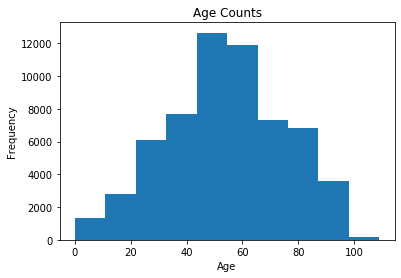

In [13]:
plt.title('Age Counts')
age.plot(kind='hist');
plt.xlabel('Age')

Text(0.5, 0, 'Age')

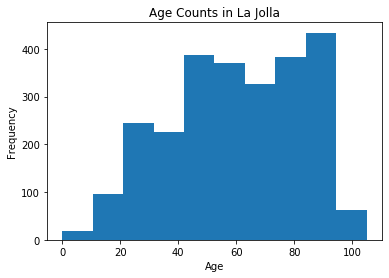

In [14]:
lj = san_diego[san_diego['Death City'].apply(lambda x: x in ['La Jolla'])]
lj_age = lj.Age
plt.title('Age Counts in La Jolla')
lj_age.plot(kind='hist');
plt.xlabel('Age')

Text(0.5, 0, 'Age')

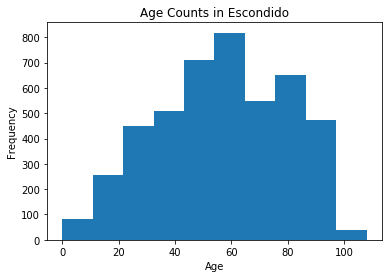

In [15]:
es = san_diego[san_diego['Death City'].apply(lambda x: x in ['Escondido'])]
es_age = es.Age
plt.title('Age Counts in Escondido')
es_age.plot(kind='hist');
plt.xlabel('Age')

We drop null values to see if the distribution changes at all.

Text(0.5, 0, 'Age')

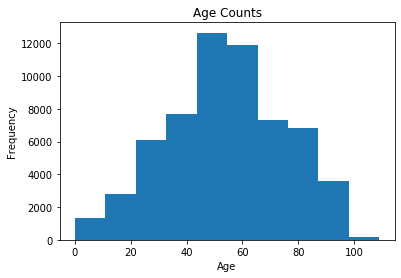

In [16]:
plt.title('Age Counts')
age.dropna().plot(kind='hist');
plt.xlabel('Age')

Text(0.5, 0, 'Age')

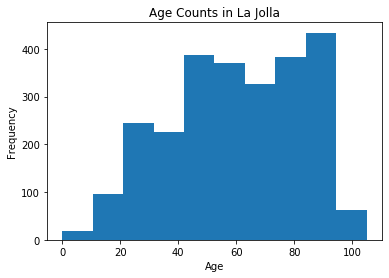

In [17]:
plt.title('Age Counts in La Jolla')
lj_age.dropna().plot(kind='hist');
plt.xlabel('Age')

Text(0.5, 0, 'Age')

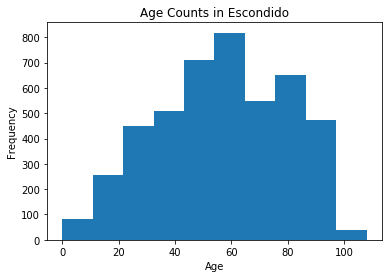

In [18]:
plt.title('Age Counts in Escondido')
es_age.dropna().plot(kind='hist');
plt.xlabel('Age')

In [19]:
print(age.isnull().sum()/len(age),lj_age.isnull().sum()/len(lj_age),es_age.isnull().sum()/len(es_age))

0.007670323894619276 0.0011755485893416929 0.005265467310223783


We drop the missing values in age because it only takes up 0.76% of the data. Moreover, the distribution for age and the distribution for age without the missing values are similar.

In [20]:
san_diego = san_diego.dropna()
san_diego.head()

,Ethnic Group (Standardized),Death Date,Death Zip,Death City,Age,Gender,Race,Manner of Death,Manner Type,Manner Type (Standardized),Manner Sub Type,Manner Sub Type (Standardized),Cause of Death,Contributing Conditions,How Injury Occurred,Event Place,Event Place Type,Event Date,Event Zip,Age Group Option 1
5457,White,09/27/1999,92056,Oceanside,86.0,Female,White,Accident,Motor Vehicle,Motor Vehicle,Auto vs Auto,Auto vs Auto,Congestive heart failure due to: Valvular and ...,Blunt force injury of chest,"Driver, private passenger vehicle, collided wi...",Street,Other,7/22/1999,92056,80 to 89
7271,Hispanic,01/17/2000,92103,San Diego,37.0,Male,Hispanic Mexican,Accident,Motor Vehicle,Motor Vehicle,Auto Over (single v),Auto Rollover (solo),Bronchopneumonia due to: Cervical fracture due...,No,"Driver,pickup truck, lost control, ran off roa...",Highway,Other,12/25/1999,92103,30 to 39
7287,White,01/25/2000,92103,San Diego,63.0,Female,White,Accident,Motor Vehicle,Motor Vehicle,Auto vs Pedestrian,Auto vs Pedestrian,"Compression asphyxia & blunt injuries, chest",Acute alcohol intoxication,Pinned under motor vehicle after it backed ove...,Parking lot,Other,1/25/2000,92154,60 to 69
7308,White,02/04/2000,92019,El Cajon,78.0,Male,White,Accident,Motor Vehicle,Motor Vehicle,Auto vs Auto,Auto vs Auto,Pneumonia due to: Qaudriplegia due to: Fractur...,No,"Driver, private passenger vehicle, lost contro...",Street,Other,10/25/1999,92083,70 to 79
7394,Hispanic,03/11/2000,92008,Carlsbad,18.0,Male,Hispanic Mexican,Accident,Motor Vehicle,Motor Vehicle,Auto vs Auto,Auto vs Auto,Multiple blunt force injuries,No,Driver private passenger vehicle collided with...,Roadway,Other,3/11/2000,92008,10 to 19


Currently, the age column is of type *float*. However, age are only values that do not have decimals, so we convert ae into type *int*.

In [21]:
san_diego.Age = san_diego.Age.astype('int')

In [22]:
deathZip_count = pd.DataFrame(san_diego.groupby("Death Zip").size())
deathZip_count[deathZip_count[0]>10]
deathZip_count.rename(columns = {0:'count'}, inplace = True)
deathZip_count=deathZip_count.reset_index()
deathZip_count.head()

,Death Zip,count
0,91901,24
1,91902,15
2,91905,12
3,91906,13
4,91910,190


In [23]:
sd_geo="updated_file.json"
m = folium.Map(location=[32.7157, -117.1611], zoom_start=11)

folium.Choropleth(
    geo_data=sd_geo,
    name='choropleth',
    data=deathZip_count,
    columns=['Death Zip', 'count'],
    key_on='feature.properties.external_id',
    fill_color='Dark2',
    fill_opacity=0.7,
    line_opacity=0.2,
).add_to(m)

folium.LayerControl().add_to(m)

m

Below is the map created above. It is just in case GitHub doesn't display the map

![map](./map.jpeg)

## Verifying our hypothesis -  Permutation Test


Null hypothesis: The death rate in Escondido and La Jolla have the same death rates per age.  
Alternative hypothesis: The death rate in Escondido and La Jolla have different death rates per age.

A permutation test is used to try to compare if two populations are sampled from the same population.  

Steps:
- Calculate the observed statistic -- difference of means for ages or total variation distance between ages.
- For 2000 iterations, we:
    * Shuffled the age column
    * Calculated the test statistic that was the result of this shuffling
    * Saved the test statistic in a list
- Calculate the p value
 
** Disclaimer: the permutation source code was borrowed from DSC 80.


In [24]:
# function and idea is borrowed from DSC 80
def permutation_test(data, col, group_col, test_statistic, N=1000):
    """
    Return the distribution of permuted statistics and the observed statistic
    resulting from a permutation test.

    :param: data: DataFrame of data observations and the labels for two groups.
    :param: col: Column name for the column containing the data.
    :param: group_col: Column name for the column contain the labels for the two groups.
    :param: test_statistic: The test statistic to apply to the groups (a function).
    :param: N: The number of times N to run the permutation test.
    """

    # get the observed test statistic
    obs = test_statistic(data, col, group_col)

    # run the permutations
    shuffled_stats = []
    for _ in range(N):
        shuffle = data[group_col].sample(frac=1, replace=False).reset_index(drop=True)
        with_shuffled = data[[col]].reset_index(drop = True)
        with_shuffled['shuffled'] = shuffle
        shuffled_stat = test_statistic(with_shuffled, col, 'shuffled')
        shuffled_stats.append(shuffled_stat)

    shuffled_stats = np.array(shuffled_stats)

    return shuffled_stats, obs

def tvd(data, col, group_col):
    """
    Total variation distance compares two distributions
    and tells us their difference.
    """

    tvd = (
        data
        .pivot_table(
            index=col, 
            columns=group_col, 
            aggfunc='size', 
            fill_value=0
        )
        .apply(lambda x: x / x.sum())
        .diff(axis=1).iloc[:, -1].abs().sum() / 2
        )
    return tvd

def diff_in_means(data, col, group_col):
    """difference in means"""
    return data.groupby(group_col)[col].mean().diff().iloc[-1]

Two cities: Escondido & La Jolla


In [25]:
cities = san_diego[san_diego['Death City'].apply(lambda x: x in ['La Jolla', 'Escondido'])]

In [26]:
N = 2000
test, obs = permutation_test(cities, 'Age', 'Death City', tvd, N)

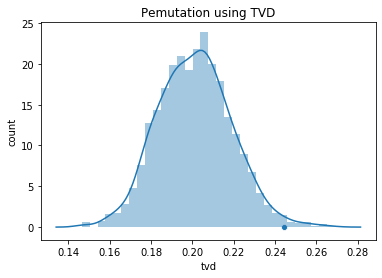

In [27]:
ax = sns.distplot(test).set_title('Pemutation using TVD');
plt.xlabel("tvd")
plt.ylabel("count")
sns.scatterplot([obs], 0);

In [28]:
(test>=obs).sum()/ N

0.0115

Reject the null

Text(0.5, 0, 'Age')

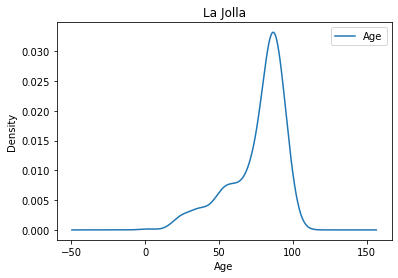

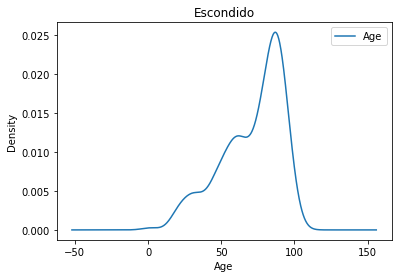

In [29]:
cities.groupby('Death City').get_group("La Jolla").plot(kind='kde')
plt.title("La Jolla")
plt.xlabel("Age")
cities.groupby('Death City').get_group("Escondido").plot(kind='kde')
plt.title("Escondido")
plt.xlabel("Age")

Use a different test statistic

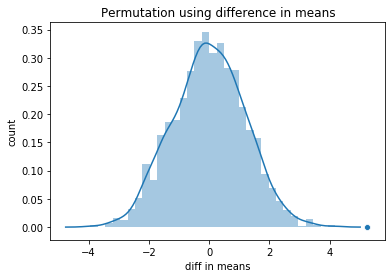

In [30]:
N = 2000
test, obs = permutation_test(cities, 'Age', 'Death City', diff_in_means, N)
sns.distplot(test);
plt.title('Permutation using difference in means')
plt.xlabel("diff in means")
plt.ylabel("count")
sns.scatterplot([obs], 0);

In [31]:
(test>=obs).sum()/ N

0.0

Still reject

## Digging deeper

- Checked what were the major death causes within age groups
- Grabbed the zips of La Jolla and Escondido
- Dropped all manner types that were unknown, undetermined, and other
- Grouped all ages by 10s and outputted the most major death cause for that age group and the amount
- Sorted the age groups
- Renamed the appropriate columns

In [32]:
lajolla = san_diego[(san_diego['Event Zip'] == "92037")].rename({"Age Group Option 1":"Age Group"},axis = 1)
escondido = san_diego[((san_diego['Event Zip'] == "92025")|
                       (san_diego['Event Zip'] == "92026")|
                       (san_diego['Event Zip'] == "92027")|
                       (san_diego['Event Zip'] == "92029")|
                       (san_diego['Event Zip'] == "92030")|
                       (san_diego['Event Zip'] == "92033")|
                       (san_diego['Event Zip'] == "92046"))].rename({"Age Group Option 1":"Age Group"},axis = 1)

In [33]:
c_lajolla = lajolla[lajolla['Age Group'] != "Unknown"]
c_escondido = escondido[escondido['Age Group'] != "Unknown"]

In [34]:
group_l = c_lajolla[c_lajolla["Manner Type (Standardized)"] != "Undetermined"]
group_e = c_escondido[c_escondido["Manner Type (Standardized)"] != "Undetermined"]
group_e = group_e[group_e["Manner Type (Standardized)"] != "Other"]

In [35]:
la_jolla = group_l.groupby(["Age Group","Manner Type (Standardized)"]).agg({"Gender":"count"})
escondido_g = group_e.groupby(["Age Group","Manner Type (Standardized)"]).agg({"Gender":"count"})

In [36]:
escondido_g = escondido_g.sort_values(['Age Group','Gender'], ascending = False)
la_jolla = la_jolla.sort_values(['Age Group','Gender'], ascending = False)

In [37]:
escondido = escondido_g.groupby(level=0).head(1).sort_values('Age Group').rename({"Gender":"Amount"},axis = 1)
escondido

,,Amount
Age Group,Manner Type (Standardized),
0 to 09,Asphyxia,2
10 to 19,Motor Vehicle,4
20 to 29,Drug - Medication,10
30 to 39,Drug - Medication,18
40 to 49,Drug - Medication,22
50 to 59,Drug - Medication,42
60 to 69,Drug - Medication,33
70 to 79,Fall,34
80 to 89,Fall,91


In [38]:
la_jolla.groupby(level=0).head(1).sort_values('Age Group').rename({"Gender":"Amount"},axis = 1)

,,Amount
Age Group,Manner Type (Standardized),
20 to 29,Motor Vehicle,2
30 to 39,Drug - Medication,5
40 to 49,Drug - Medication,4
50 to 59,Drug - Medication,7
60 to 69,Fall,10
70 to 79,Fall,11
80 to 89,Fall,36
90+,Fall,38


# Ethics & Privacy

- Permission of Usage:
We obtained our medical examiner dataset on San Diego County’s website. This website is accessible by the general public, and web-scraping is allowed from San Diego.
 
- Data Privacy
According to the description of the dataset, “The data follows privacy guidelines that protect the deceased person and person’s family, and so does not include names, dates of birth, case numbers or specific addresses,” several personal information has been removed from the dataset prior to release. Moreover, we followed the Safe Harbor guidelines to mask the zip code to contain only three digits if the population is over 20,000 and change all zipcodes to 0 if their population is under 20,000. We also filtered out any age that is above 90.
 
- Potential Bias
  * I. Recording Issues
     - If the data (event place, death place, manner of death) can not be categorized, it will be recorded in the category of “other” or “undetermined”. This may affect our analysis since the full picture is not shown. However, we decided to filter out those values because we want to focus on what is known (death cause and place) for the purpose of this analysis, as any further precaution can only be made on what is known to be potentially dangerous.
 
  * II. NaN Values
    - There are some nan values throughout the dataset. We dropped the missing values in age because it only takes up 0.76% of the data. The distribution for age and the distribution for age without the missing values are similar. Moreover, the NaN value does not seem to appear in particular locations.
 
  * III. Other Factors
    - There may be several factors that play a role in the death rate distribution of two populations (La Jolla and Escondido) such as income that we did not take into account. However, we decided to focus on the death rate by age only, because of the apparent correlation between age and death rate.
 
  * IV. Conveying the Result
    - Since our analysis involves a sensitive topic, we want to avoid any potential harm to anyone. We do this analysis by age group to just indicate the proximal life stage of a person. This project is only intended to make people be aware of some potential causes of fatal injury in our daily life but not raise any unnecessary anxiety. That is why we dropped those cases with undetermined cause. 
 
  * V. Potential Use of Our Analysis
    - There are some parties who may be interested in our analysis such as local government or hospitals. A potential harm would be hospitals knowingly increase cost of certain medical care process or equipment. However, a potential benefit would be bring the awareness of these cause of potentially fatal injury.


# Conclusion & Discussion

We set out to answer if cities in the same county have different death rates. We hypothesized that Escondido and La Jolla come from the same population and it wasn't dependent on the location. The data we used is the medical examiner data from the San Diego County open data portal. It was 5% of the total deaths in San Diego within 1997-2019.
 
After cleaning the data and picking the necessary columns, we analyzed the age distribution in the data to see if our data had any bias toward a certain age. Next, we looked at how many missing values were in the dataset and if it would skew the data. There was only 0.76% of null values in the data set so it would not change the dataset in a huge way if we dropped it. We also mapped the data to see if there was an equal distribution of deaths between La Jolla and Escondido. We did a permutation test and used a signifigance of 0.05. We ended up with a 0.0065 for tvd and 0.0 for difference in means so we rejected that La Jolla and Escondido deaths came from the same population. We did more exploration and found that ages 0-30 and 60-69 had different major death causes or no deaths.
 
There were a few limitations to this data that made it hard to accurately gauge our research question and hypothesis. When looking at data for deaths, sometimes there were people who didn't have an event zip or location because they were not found immediately after death, leaving the event area to be unknown. Not only that, some reasons were other and when reading the unstandardized manner types, the reasoning could not be categorized in any way. We ended up dropping any row that had any null values and dropped people with unknown or other as their death cause. The impact of this work on society is to try to understand if there are underlying issues in some areas that aren't in others. For example, there is more drug deaths between ages 20-70 in Escondido than La Jolla where drug deaths are only between ages 30-60. This alerts us that in both areas we saw drugs a major cause of death, telling us that there is a major drug problem in these areas. Our work is trying to alert the government that these causes of death aren't just small scale but large scale even in areas that are generally considered more safe.

# Team Contributions

|   |  Jeff Liao | Sally Poon  | Pan Yeung  | Chieh Pan  |
|---|---|---|---|---|
| EDA  | V  | V  | V  | V  |
| Report  | V  | V  | V  | V  |
| Scheduling  | V  | V | V  | V  |
| Book Room  | V  |   |   |   |
| Maps |   |   | V  |   |
| Permutation test | V | | | |
| Digger Deeper | | V | | |
| Overview | | | | |
| Dataset | | | | |
| Background | V | | | |
| Privacy and Ethics | | | | V |
| Conclusion | | V | | |